In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q1 Part (a) Write training loop

118it [00:08, 13.88it/s]                                                        


Epoch 1 of 100
Generator loss: 1.46340430, Discriminator loss: 0.86278355


118it [00:08, 13.95it/s]                                                        


Epoch 2 of 100
Generator loss: 1.76530552, Discriminator loss: 1.14778256


118it [00:08, 13.85it/s]                                                        


Epoch 3 of 100
Generator loss: 4.17347765, Discriminator loss: 0.56824863


118it [00:08, 13.92it/s]                                                        


Epoch 4 of 100
Generator loss: 1.62148249, Discriminator loss: 1.21864378


118it [00:08, 13.87it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


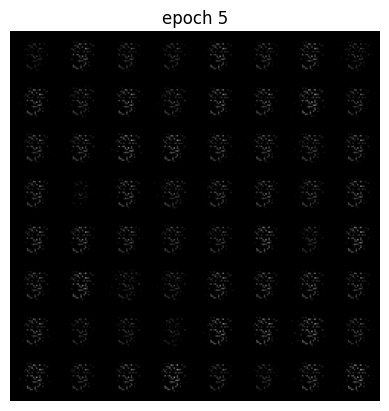

Epoch 5 of 100
Generator loss: 1.47902131, Discriminator loss: 1.22560251


118it [00:08, 13.64it/s]                                                        


Epoch 6 of 100
Generator loss: 1.90426326, Discriminator loss: 0.89923674


118it [00:08, 13.84it/s]                                                        


Epoch 7 of 100
Generator loss: 1.80212784, Discriminator loss: 1.16225302


118it [00:08, 13.74it/s]                                                        


Epoch 8 of 100
Generator loss: 2.25859642, Discriminator loss: 1.24836946


118it [00:08, 13.77it/s]                                                        


Epoch 9 of 100
Generator loss: 1.74250424, Discriminator loss: 1.22045803


118it [00:08, 13.76it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


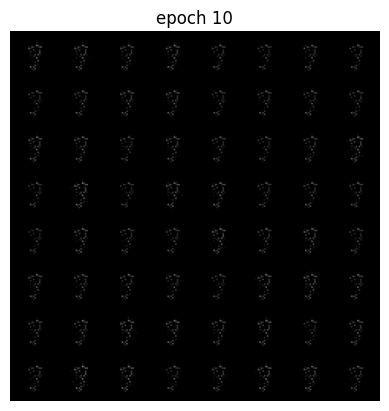

Epoch 10 of 100
Generator loss: 1.45026481, Discriminator loss: 1.27570820


118it [00:08, 13.72it/s]                                                        


Epoch 11 of 100
Generator loss: 1.83238769, Discriminator loss: 0.77309132


118it [00:08, 13.74it/s]                                                        


Epoch 12 of 100
Generator loss: 2.27437401, Discriminator loss: 0.98411101


118it [00:08, 13.79it/s]                                                        


Epoch 13 of 100
Generator loss: 1.77337933, Discriminator loss: 1.20764160


118it [00:08, 13.71it/s]                                                        


Epoch 14 of 100
Generator loss: 3.18872666, Discriminator loss: 1.04835451


118it [00:08, 13.77it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


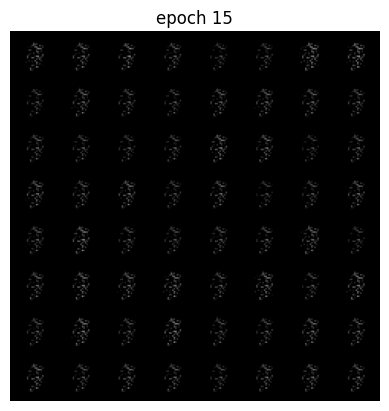

Epoch 15 of 100
Generator loss: 1.41841042, Discriminator loss: 1.08264172


118it [00:08, 13.66it/s]                                                        


Epoch 16 of 100
Generator loss: 1.51280522, Discriminator loss: 0.88247263


118it [00:08, 13.71it/s]                                                        


Epoch 17 of 100
Generator loss: 2.16780424, Discriminator loss: 0.80069804


118it [00:08, 13.75it/s]                                                        


Epoch 18 of 100
Generator loss: 2.18001676, Discriminator loss: 0.71449959


118it [00:08, 13.70it/s]                                                        


Epoch 19 of 100
Generator loss: 1.97226703, Discriminator loss: 0.69583046


118it [00:08, 13.74it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


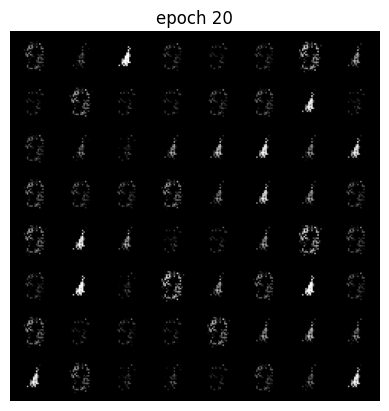

Epoch 20 of 100
Generator loss: 2.63545251, Discriminator loss: 0.65818036


118it [00:08, 13.69it/s]                                                        


Epoch 21 of 100
Generator loss: 2.36791921, Discriminator loss: 0.82028419


118it [00:08, 13.75it/s]                                                        


Epoch 22 of 100
Generator loss: 2.25219607, Discriminator loss: 0.59158432


118it [00:08, 13.76it/s]                                                        


Epoch 23 of 100
Generator loss: 2.65201735, Discriminator loss: 0.52720261


118it [00:08, 13.73it/s]                                                        


Epoch 24 of 100
Generator loss: 2.60307837, Discriminator loss: 0.60083908


118it [00:08, 13.64it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


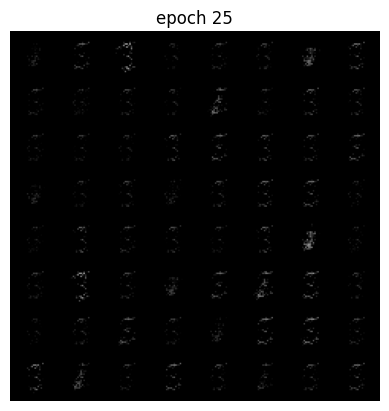

Epoch 25 of 100
Generator loss: 2.98069334, Discriminator loss: 0.37515768


118it [00:08, 13.70it/s]                                                        


Epoch 26 of 100
Generator loss: 3.00147247, Discriminator loss: 0.47160271


118it [00:08, 13.78it/s]                                                        


Epoch 27 of 100
Generator loss: 2.80480194, Discriminator loss: 0.55092061


118it [00:08, 13.83it/s]                                                        


Epoch 28 of 100
Generator loss: 2.59959841, Discriminator loss: 0.60414761


118it [00:08, 13.81it/s]                                                        


Epoch 29 of 100
Generator loss: 2.91328073, Discriminator loss: 0.48127219


118it [00:08, 13.77it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


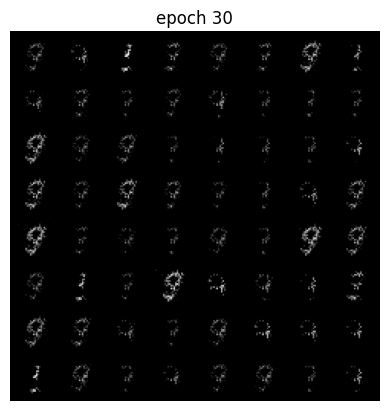

Epoch 30 of 100
Generator loss: 2.92849517, Discriminator loss: 0.49888936


118it [00:08, 13.78it/s]                                                        


Epoch 31 of 100
Generator loss: 2.62008619, Discriminator loss: 0.69295096


118it [00:08, 13.77it/s]                                                        


Epoch 32 of 100
Generator loss: 2.41831231, Discriminator loss: 0.52061915


118it [00:08, 13.88it/s]                                                        


Epoch 33 of 100
Generator loss: 2.45190454, Discriminator loss: 0.61848116


118it [00:08, 13.88it/s]                                                        


Epoch 34 of 100
Generator loss: 2.51038408, Discriminator loss: 0.58642942


118it [00:08, 13.87it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


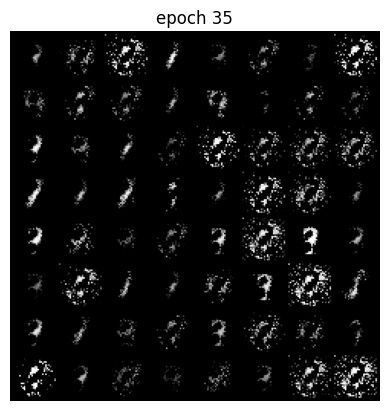

Epoch 35 of 100
Generator loss: 2.83720636, Discriminator loss: 0.58130652


118it [00:08, 13.75it/s]                                                        


Epoch 36 of 100
Generator loss: 2.53033495, Discriminator loss: 0.60627699


118it [00:08, 13.79it/s]                                                        


Epoch 37 of 100
Generator loss: 2.89643192, Discriminator loss: 0.50861514


118it [00:08, 13.76it/s]                                                        


Epoch 38 of 100
Generator loss: 2.39601827, Discriminator loss: 0.63727808


118it [00:08, 13.77it/s]                                                        


Epoch 39 of 100
Generator loss: 2.41613150, Discriminator loss: 0.63549298


118it [00:08, 13.61it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


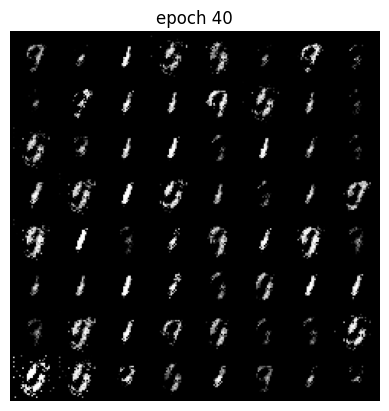

Epoch 40 of 100
Generator loss: 2.58047938, Discriminator loss: 0.54075706


118it [00:08, 13.67it/s]                                                        


Epoch 41 of 100
Generator loss: 2.46109772, Discriminator loss: 0.61871159


118it [00:08, 13.78it/s]                                                        


Epoch 42 of 100
Generator loss: 2.36771488, Discriminator loss: 0.65771371


118it [00:08, 13.75it/s]                                                        


Epoch 43 of 100
Generator loss: 2.30164981, Discriminator loss: 0.61154687


118it [00:08, 13.27it/s]                                                        


Epoch 44 of 100
Generator loss: 2.46343279, Discriminator loss: 0.60802108


118it [00:08, 13.60it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


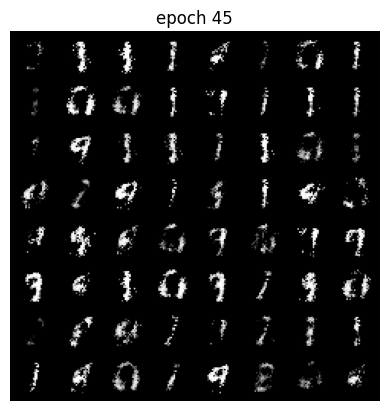

Epoch 45 of 100
Generator loss: 2.44411683, Discriminator loss: 0.55548233


118it [00:08, 13.65it/s]                                                        


Epoch 46 of 100
Generator loss: 2.41309619, Discriminator loss: 0.62614006


118it [00:08, 13.69it/s]                                                        


Epoch 47 of 100
Generator loss: 2.24820137, Discriminator loss: 0.66663432


118it [00:08, 13.79it/s]                                                        


Epoch 48 of 100
Generator loss: 2.30158973, Discriminator loss: 0.75174463


118it [00:08, 13.79it/s]                                                        


Epoch 49 of 100
Generator loss: 2.32066417, Discriminator loss: 0.66219753


118it [00:08, 13.81it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


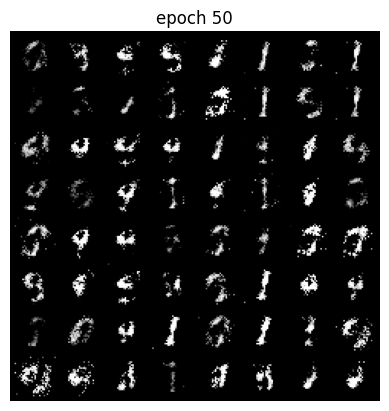

Epoch 50 of 100
Generator loss: 2.04308820, Discriminator loss: 0.75516188


118it [00:08, 13.71it/s]                                                        


Epoch 51 of 100
Generator loss: 2.22083473, Discriminator loss: 0.67652428


118it [00:08, 13.75it/s]                                                        


Epoch 52 of 100
Generator loss: 2.25626373, Discriminator loss: 0.67520946


118it [00:08, 13.79it/s]                                                        


Epoch 53 of 100
Generator loss: 2.37716436, Discriminator loss: 0.64470553


118it [00:08, 13.82it/s]                                                        


Epoch 54 of 100
Generator loss: 2.52531576, Discriminator loss: 0.64092994


118it [00:08, 13.85it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


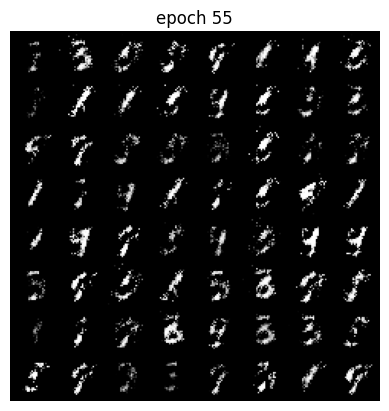

Epoch 55 of 100
Generator loss: 2.36432147, Discriminator loss: 0.65861076


118it [00:08, 13.87it/s]                                                        


Epoch 56 of 100
Generator loss: 2.40244412, Discriminator loss: 0.64426583


118it [00:08, 13.91it/s]                                                        


Epoch 57 of 100
Generator loss: 2.69553566, Discriminator loss: 0.56443512


118it [00:08, 13.81it/s]                                                        


Epoch 58 of 100
Generator loss: 2.59612942, Discriminator loss: 0.67723227


118it [00:08, 13.87it/s]                                                        


Epoch 59 of 100
Generator loss: 2.58235860, Discriminator loss: 0.63820440


118it [00:08, 13.86it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


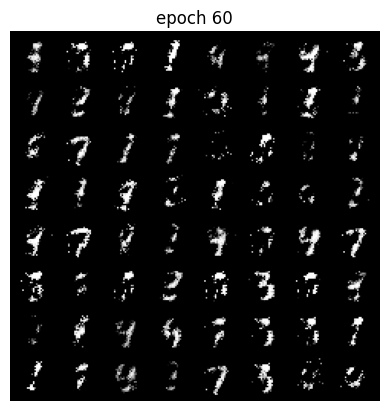

Epoch 60 of 100
Generator loss: 2.84247494, Discriminator loss: 0.55446762


118it [00:08, 13.79it/s]                                                        


Epoch 61 of 100
Generator loss: 2.78355312, Discriminator loss: 0.59235448


118it [00:08, 13.84it/s]                                                        


Epoch 62 of 100
Generator loss: 2.46371174, Discriminator loss: 0.62992847


118it [00:08, 13.87it/s]                                                        


Epoch 63 of 100
Generator loss: 2.62140417, Discriminator loss: 0.61616850


118it [00:08, 13.77it/s]                                                        


Epoch 64 of 100
Generator loss: 2.78125191, Discriminator loss: 0.62100822


118it [00:08, 13.82it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


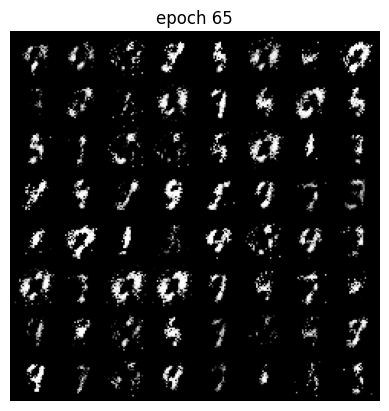

Epoch 65 of 100
Generator loss: 2.72361279, Discriminator loss: 0.62410372


118it [00:08, 13.83it/s]                                                        


Epoch 66 of 100
Generator loss: 2.50997853, Discriminator loss: 0.70208937


118it [00:08, 13.94it/s]                                                        


Epoch 67 of 100
Generator loss: 2.56592870, Discriminator loss: 0.61837828


118it [00:08, 13.89it/s]                                                        


Epoch 68 of 100
Generator loss: 2.34595990, Discriminator loss: 0.67300183


118it [00:08, 13.93it/s]                                                        


Epoch 69 of 100
Generator loss: 2.32738614, Discriminator loss: 0.68962771


118it [00:08, 13.92it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


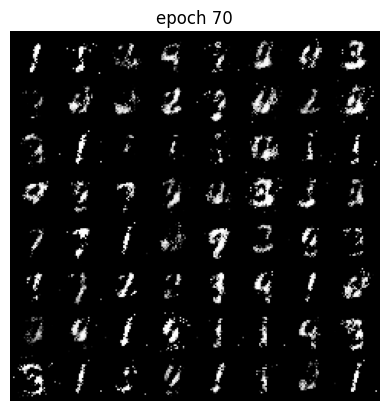

Epoch 70 of 100
Generator loss: 2.47413230, Discriminator loss: 0.62627959


118it [00:08, 13.90it/s]                                                        


Epoch 71 of 100
Generator loss: 2.39472198, Discriminator loss: 0.69687527


118it [00:08, 13.92it/s]                                                        


Epoch 72 of 100
Generator loss: 2.35686731, Discriminator loss: 0.75980747


118it [00:08, 13.91it/s]                                                        


Epoch 73 of 100
Generator loss: 2.39602971, Discriminator loss: 0.66922849


118it [00:08, 13.96it/s]                                                        


Epoch 74 of 100
Generator loss: 2.54083490, Discriminator loss: 0.62857592


118it [00:08, 13.93it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


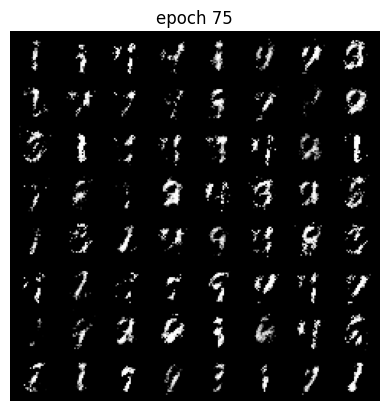

Epoch 75 of 100
Generator loss: 2.33077192, Discriminator loss: 0.66527224


118it [00:08, 13.95it/s]                                                        


Epoch 76 of 100
Generator loss: 2.28510880, Discriminator loss: 0.68433660


118it [00:08, 13.97it/s]                                                        


Epoch 77 of 100
Generator loss: 2.23635054, Discriminator loss: 0.67586571


118it [00:08, 13.99it/s]                                                        


Epoch 78 of 100
Generator loss: 2.32478738, Discriminator loss: 0.69694525


118it [00:08, 13.93it/s]                                                        


Epoch 79 of 100
Generator loss: 2.42977619, Discriminator loss: 0.65558064


118it [00:08, 13.93it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


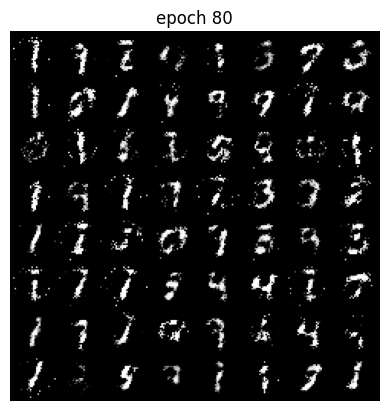

Epoch 80 of 100
Generator loss: 2.38255954, Discriminator loss: 0.68604690


118it [00:08, 13.87it/s]                                                        


Epoch 81 of 100
Generator loss: 2.34715939, Discriminator loss: 0.66981649


118it [00:08, 13.91it/s]                                                        


Epoch 82 of 100
Generator loss: 2.31519508, Discriminator loss: 0.63010085


118it [00:08, 13.92it/s]                                                        


Epoch 83 of 100
Generator loss: 2.32788968, Discriminator loss: 0.68167329


118it [00:08, 13.89it/s]                                                        


Epoch 84 of 100
Generator loss: 2.32909703, Discriminator loss: 0.67406666


118it [00:08, 13.88it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


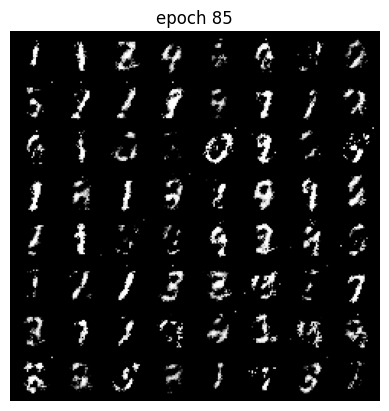

Epoch 85 of 100
Generator loss: 2.29407883, Discriminator loss: 0.72308737


118it [00:08, 13.72it/s]                                                        


Epoch 86 of 100
Generator loss: 2.14837694, Discriminator loss: 0.75848520


118it [00:08, 13.84it/s]                                                        


Epoch 87 of 100
Generator loss: 2.21763730, Discriminator loss: 0.72369522


118it [00:08, 13.80it/s]                                                        


Epoch 88 of 100
Generator loss: 2.26781178, Discriminator loss: 0.67297244


118it [00:08, 13.81it/s]                                                        


Epoch 89 of 100
Generator loss: 2.18520069, Discriminator loss: 0.73959637


118it [00:08, 13.82it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


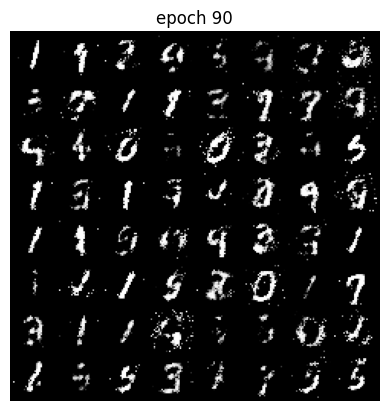

Epoch 90 of 100
Generator loss: 2.09965181, Discriminator loss: 0.77275181


118it [00:08, 13.84it/s]                                                        


Epoch 91 of 100
Generator loss: 2.01143146, Discriminator loss: 0.77043599


118it [00:09, 13.08it/s]                                                        


Epoch 92 of 100
Generator loss: 2.09205818, Discriminator loss: 0.74362224


118it [00:08, 13.57it/s]                                                        


Epoch 93 of 100
Generator loss: 2.13339162, Discriminator loss: 0.75454909


118it [00:08, 13.73it/s]                                                        


Epoch 94 of 100
Generator loss: 2.20407963, Discriminator loss: 0.74307340


118it [00:08, 13.81it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


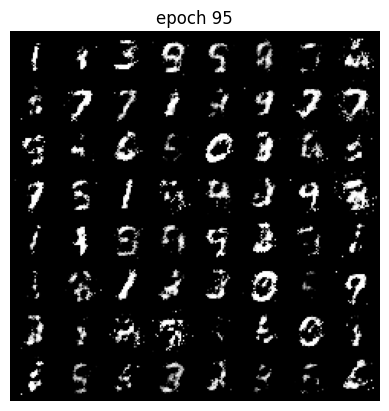

Epoch 95 of 100
Generator loss: 2.11782598, Discriminator loss: 0.76729190


118it [00:08, 13.46it/s]                                                        


Epoch 96 of 100
Generator loss: 2.26852942, Discriminator loss: 0.71679217


118it [00:08, 13.68it/s]                                                        


Epoch 97 of 100
Generator loss: 2.16460323, Discriminator loss: 0.70399469


118it [00:08, 13.81it/s]                                                        


Epoch 98 of 100
Generator loss: 2.10264754, Discriminator loss: 0.74252689


118it [00:08, 13.55it/s]                                                        


Epoch 99 of 100
Generator loss: 2.18531013, Discriminator loss: 0.73974204


118it [00:08, 14.02it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


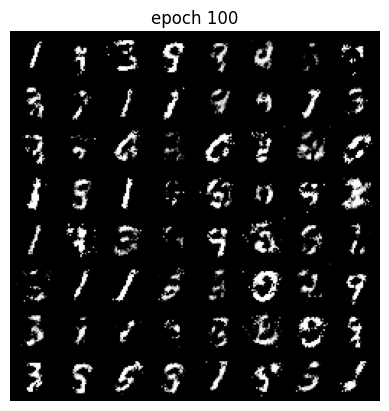

Epoch 100 of 100
Generator loss: 2.00211835, Discriminator loss: 0.77087915


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        optim_d.zero_grad()
        
        x, _ = data
        x = x.to(device)
        batch_size = x.size(0)

        z = create_noise(batch_size, nz)
        G_z = generator(z).detach()
    
        D_x = discriminator(x)
        D_G_z = discriminator(G_z)

        real_labels = label_real(batch_size)
        fake_labels = label_fake(batch_size)
        
        loss_d_on_x = discriminator_loss(D_x, real_labels)
        loss_d_on_G_z = discriminator_loss(D_G_z, fake_labels)

        loss_d_on_x_and_G_z = loss_d_on_x + loss_d_on_G_z
        
        loss_d_on_x_and_G_z.backward()
        optim_d.step()
        
        loss_d += loss_d_on_x_and_G_z

        optim_g.zero_grad()

        z = create_noise(batch_size, nz)
        G_z = generator(z)

        D_G_z = discriminator(G_z)

        batch_size = G_z.size(0)
        real_labels = label_real(batch_size)
        
        loss_g_on_G_z = generator_loss(D_G_z, real_labels)
        
        loss_g_on_G_z.backward()
        optim_g.step()
        
        loss_g += loss_g_on_G_z

        # Reference:
        # 1. S.R. Rath, "Generating MNIST Digit Images using Vanilla GAN with PyTorch", Aug 2020
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/a_gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g.detach().cpu())
    losses_d.append(epoch_loss_d.detach().cpu())
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/a_generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/a_generator_images.gif', imgs)

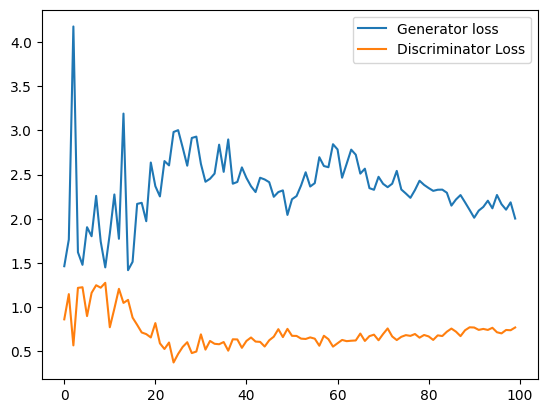

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/a_loss.png')